<a href="https://colab.research.google.com/github/mrsferret/Food-Poverty-Project/blob/main/Plotting_Geospatial_Data_using_GeoPandas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

---
# Plotting Geospatial Data using GeoPandas

---

Tutorial from https://www.geeksforgeeks.org/plotting-geospatial-data-using-geopandas/

GeoPandas is an open source tool to add support for geographic data to Pandas objects. In this, article we are going to use GeoPandas and Matplotlib for plotting geospatial data.

In [1]:
pip install geopandas


     |████████████████████████████████| 1.0 MB 5.1 MB/s 
     |████████████████████████████████| 6.3 MB 40.9 MB/s 
     |████████████████████████████████| 16.7 MB 135 kB/s 


In [3]:
import pandas as pd
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt

world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
world.head()

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,920938,Oceania,Fiji,FJI,8374.0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,53950935,Africa,Tanzania,TZA,150600.0,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,603253,Africa,W. Sahara,ESH,906.5,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,35623680,North America,Canada,CAN,1674000.0,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,326625791,North America,United States of America,USA,18560000.0,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."


Some of the other datasets to play with are ‘naturalearth_cities’ and ‘nybb’. Feel free to experiment with them later. We can use world and plot the same using Matplotlib.

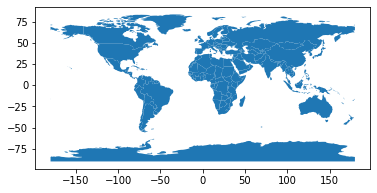

In [4]:
world.plot()

Now, if we see world, we have a lot of fields. One of them is GDP estimate(or gdp_md_est). However, to show how easily data can be filtered in or out in pandas, let’s filter out all continents except Asia. 

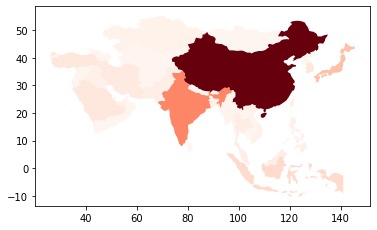

In [5]:
worldfiltered = world[world.continent == "Asia"]
worldfiltered.plot(column ='gdp_md_est', cmap ='Reds')

cmap property is used to plot the data in the shade specified. The darker shades mean higher value while the lighter shades means lower value. Now, let’s analyse the data for population estimate(pop_est).

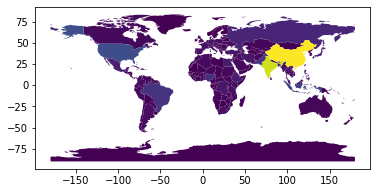

In [6]:

world.plot(column ='pop_est')

The above image is not very good in conveying the data. So let’s change some properties to make it more comprehensible. First, let’s increase the size of the figure and then set an axis for it. We first plot the world map without any data to on the axis and then we overlay the plot with the data on it with the shade red. This way the map is more clear and dark and makes the data more understandable. However, this map is still a little vague and won’t tell us what the shades mean.

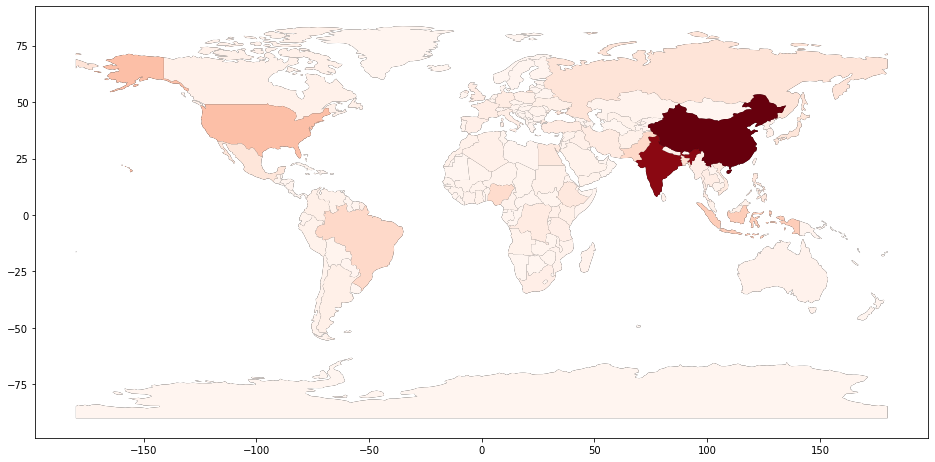

In [7]:
fig, ax = plt.subplots(1, figsize =(16, 8))
world.plot(ax = ax, color ='black')
world.plot(ax = ax, column ='pop_est', cmap ='Reds')


Let’s import the toolkits that allow us to make dividers within the plot. After this we are going to plot the graph as we did before, but this time we are going to add a facecolor. The facecolor property is going to change the background to a color it is set to(in this case, light blue). Now we need to create a divider for creating the color box within the graph, much like dividers in HTML. We are creating a divider and setting its properties like size, justification etc. 

Then we need to create the color box in the divider we created. So obviously, the highest value in the color box is going to be the highest population in the dataset and the lowest value is going to be zero. 

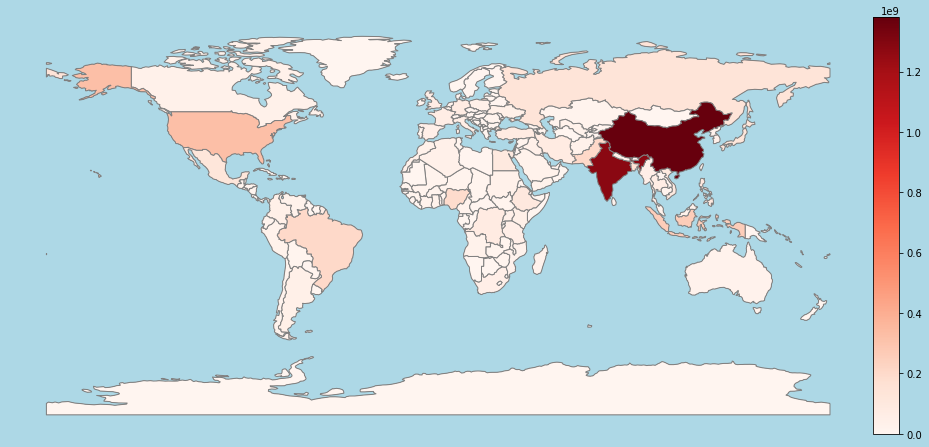

In [10]:
from mpl_toolkits.axes_grid1 import make_axes_locatable


fig, ax = plt.subplots(1, figsize =(16, 8),
					facecolor ='lightblue')

world.plot(ax = ax, color ='black')
world.plot(ax = ax, column ='pop_est', cmap ='Reds',
		edgecolors ='grey')

# axis for the color bar
div = make_axes_locatable(ax)
cax = div.append_axes("right", size ="3 %", pad = 0.05)

# color bar
vmax = world.pop_est.max()
mappable = plt.cm.ScalarMappable(cmap ='Reds',
								norm = plt.Normalize(vmin = 0, vmax = vmax))
cbar = fig.colorbar(mappable, cax)

ax.axis('off')
plt.show()


Thus in this article we have seen how we can use GeoPandas to get geospatial data and plot it using Matplotlib. Custom datasets can be used to analyse specific data and city-wise data can also be used. Also, GeoPandas can be used with Open Street Maps, which provides very specific geospatial data(example, streets, hospitals in a city etc., ). The same knowledge can be extended further and can be used for specific statistical and data analysis. 